# Intento Nº1

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



### Aqui debería ir una tabla con las constantes jeje

In [75]:
#tabla owo

In [76]:
from scipy.integrate import solve_ivp

# Condiciones iniciales
X0 = 0; #0
Ta0 = 1250 ; #K
T0 = 1035; #T=T0=1035K

#C0  = [T0; Ta0; X0]; 

# Parametros cineticos
v0= 0.002;     #m3/s
Fa0= 0.0376;   #mol/s;
Ca0 =  Fa0/v0; #mol/m3
e=1;           #coef de expansion
Cp_a= 163;     #J/mol*K;
deltaCp = -9;  #J/mol*K
#P.Hrxn= = 80,77 + P.deltaCP * (T - 298)
McCp= 3.83;    #J/s*K;
T0= 1035; #K 

#Velocidades


def deriv(V, y):
    #k = 8.1973E14*np.exp(-34.222/T);
    #Hrxn = 80.77 + deltaCp*(T - 298);
    T,Ta,X = y
    dTdV  = 8.1973E14*np.exp(-34.222/T)*Ca0*(1-X)/(1+e*X)*(T0/T)*80.77 + deltaCp*(T - 298) + 16500*(Ta-T)/(Fa0*(Cp_a - 9*X))
    dTadV = 16500*(T-Ta)/McCp
    dXdV  = (8.1973E14*np.exp(-34.222/T)*Ca0*(1-X)/(1+e*X)*(T0/T))/Fa0
    return [dTdV, dTadV, dXdV]

T es igual a 1117.4872553795944
Ta es igual a 1118.6829015394733
X es igual a 0.9999999999999754


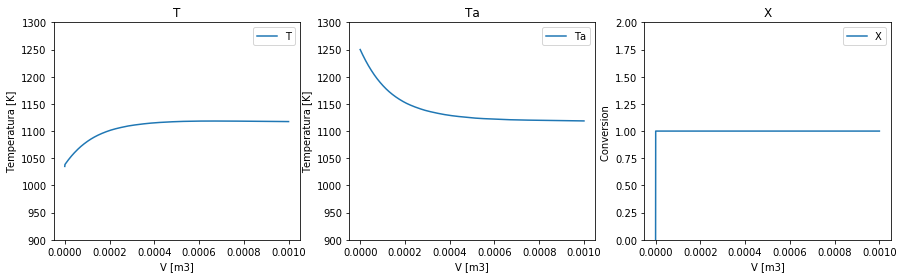

In [78]:
# simulacion PFR
IC = [T0, Ta0, X0]
V_initial = 0.0
V_final = 0.001
V = np.linspace(V_initial, V_final, 2000)
#‘LSODA’: Adams/BDF method with automatic stiffness detection and switching [7], [8]. 
#This is a wrapper of the Fortran solver from ODEPACK.
soln = solve_ivp(deriv, [t_initial, t_final],IC, t_eval=V, method='BDF')
#plot
def plot_reactor(ax, t, y):
    ax[0].plot(t, y[0], label=str('T'))
    ax[0].set_xlabel('V [m3]')
    ax[0].set_ylabel('Temperatura [K]')
    ax[0].set_title('T')
    ax[0].set_ylim(900, 1300)
    ax[0].legend()

    ax[1].plot(t, y[1], label=str('Ta'))
    ax[1].set_xlabel('V [m3]')
    ax[1].set_ylabel('Temperatura [K]');
    ax[1].set_title('Ta')
    ax[1].set_ylim(900, 1300)
    ax[1].legend()
    
    ax[2].plot(t, y[2], label=str('X'))
    ax[2].set_xlabel('V [m3]')
    ax[2].set_ylabel('Conversion ');
    ax[2].set_title('X')
    ax[2].set_ylim(0, 2)
    ax[2].legend()
    
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plot_reactor(ax, soln.t, soln.y);
T_final =soln.y[0,1999]
Ta_final=soln.y[1,1999]
X_final =soln.y[2,1999]
print('T es igual a',str(T_final))
print('Ta es igual a',str(Ta_final))
print('X es igual a',str(X_final))